This analysis will study the impact of the cluster filter on signal efficiency when the signal (10GeV muons) are generated at a vertex offset from the (0,0,0,0) IP by a length of 50mm on the z axis

In [36]:
# import data

import ROOT as R
import math
import os
import numpy as np

R.gStyle.SetOptStat(0)
R.gStyle.SetGridColor(14)
R.gStyle.SetPadRightMargin(0.03)
R.gStyle.SetPadLeftMargin(0.12)

# pull files from local drive
STUDY_NAME = "z0to50"
DIR_IN = '/Users/chris/Desktop/MC/data/ipstudies/' + STUDY_NAME
DIR_OUT = '/Users/chris/Desktop/MC/plots/ipstudy'
zs = np.arange(0,50,0.5)
NAMES = ['%.1f' % z for z in zs]
files_in = [R.TFile(os.path.join(DIR_IN,f'histograms_{n}.root')) for n in NAMES]

# extract contents from files
nH = len(NAMES)
histos_nocut_theta = [files_in[i].MyTrackPerf.clusters_vb.theta for i in range(nH)]
histos_loose_theta = [files_in[i].MyTrackPerf_loose.clusters_vb.theta for i in range(nH)]
histos_tight_theta = [files_in[i].MyTrackPerf_tight.clusters_vb.theta for i in range(nH)]

In [37]:
# grab total contents
l = len(zs)
tothits_nocut = [0] * l
tothits_loose = [0] * l
tothits_tight = [0] * l
ratio_loose   = [0] * l
r_sig_loose   = [0] * l
ratio_tight   = [0] * l
r_sig_tight   = [0] * l

numbins = histos_nocut_theta[0].GetNbinsX() # assume all histos have same num bins
# loop over each z value, each bin in histo
for iz,z in enumerate(zs):
    tothits_nocut[iz] = tot_all = np.sum([histos_nocut_theta[iz].GetBinContent(j) for j in range(numbins)])
    sig_all = np.sqrt(tothits_nocut[iz])
    tothits_loose[iz] = tot_loose = np.sum([histos_loose_theta[iz].GetBinContent(j) for j in range(numbins)])
    sig_loose = np.sqrt(tothits_loose[iz])
    tothits_tight[iz] = tot_tight = np.sum([histos_tight_theta[iz].GetBinContent(j) for j in range(numbins)])
    sig_tight = np.sqrt(tothits_tight[iz])
    
    ratio_loose[iz] = tothits_loose[iz]/tothits_nocut[iz]
    r_sig_loose[iz] = np.sqrt((sig_loose/tot_all)**2 + (tot_loose * sig_all/tot_all**2)**2)
    #
    ratio_tight[iz] = tothits_tight[iz]/tothits_nocut[iz]
    r_sig_tight[iz] = np.sqrt((sig_tight/tot_all)**2 + (tot_tight * sig_all/tot_all**2)**2)
    # 

In [ ]:
# make plot of ratios as fxn of distance from ip

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'size':16})
rc('lines', **{'linewidth':3.0})
rc('savefig', **{'facecolor':'white'})
rc('axes', **{'labelsize':16})
rc('xtick', **{'direction':'in', 'top':True, 'minor.visible':True})
rc('ytick', **{'direction':'in', 'right':True, 'minor.visible':True})

pts = [0.59059059 * 10, 1.97197197 * 10, 4.92492492 * 10]
plt.figure(figsize=(8,6),dpi=500)
plt.plot([pts[0],pts[0]],[0,1.05],'--',color='green',label=r"Possible decay, $p=60$ GeV")
plt.plot([pts[1],pts[1]],[0,1.05],'--',color='red',label=r"Possible decay, $p=200$ GeV")
plt.plot([pts[2],pts[2]],[0,1.05],'--',color='black',label=r"Possible decay, $p=500$ GeV")
plt.errorbar(zs,ratio_loose,yerr=r_sig_loose,linestyle='',marker='o',label='Loose cluster filter')
plt.errorbar(zs,ratio_tight,yerr=r_sig_tight,linestyle='',marker='o',label='Tight cluster filter')
plt.legend(framealpha=1)
plt.ylim(0.76,1.02)
plt.xlabel("Production vertex distance in z direction from IP (mm)")
plt.ylabel("Proportion of signal conserved")
plt.title("Cluster filter signal efficiency, vertex displaced in z")
plt.savefig(os.path.join(DIR_OUT,"zrange_0to50mm.png"))

# Do the same for the x direction

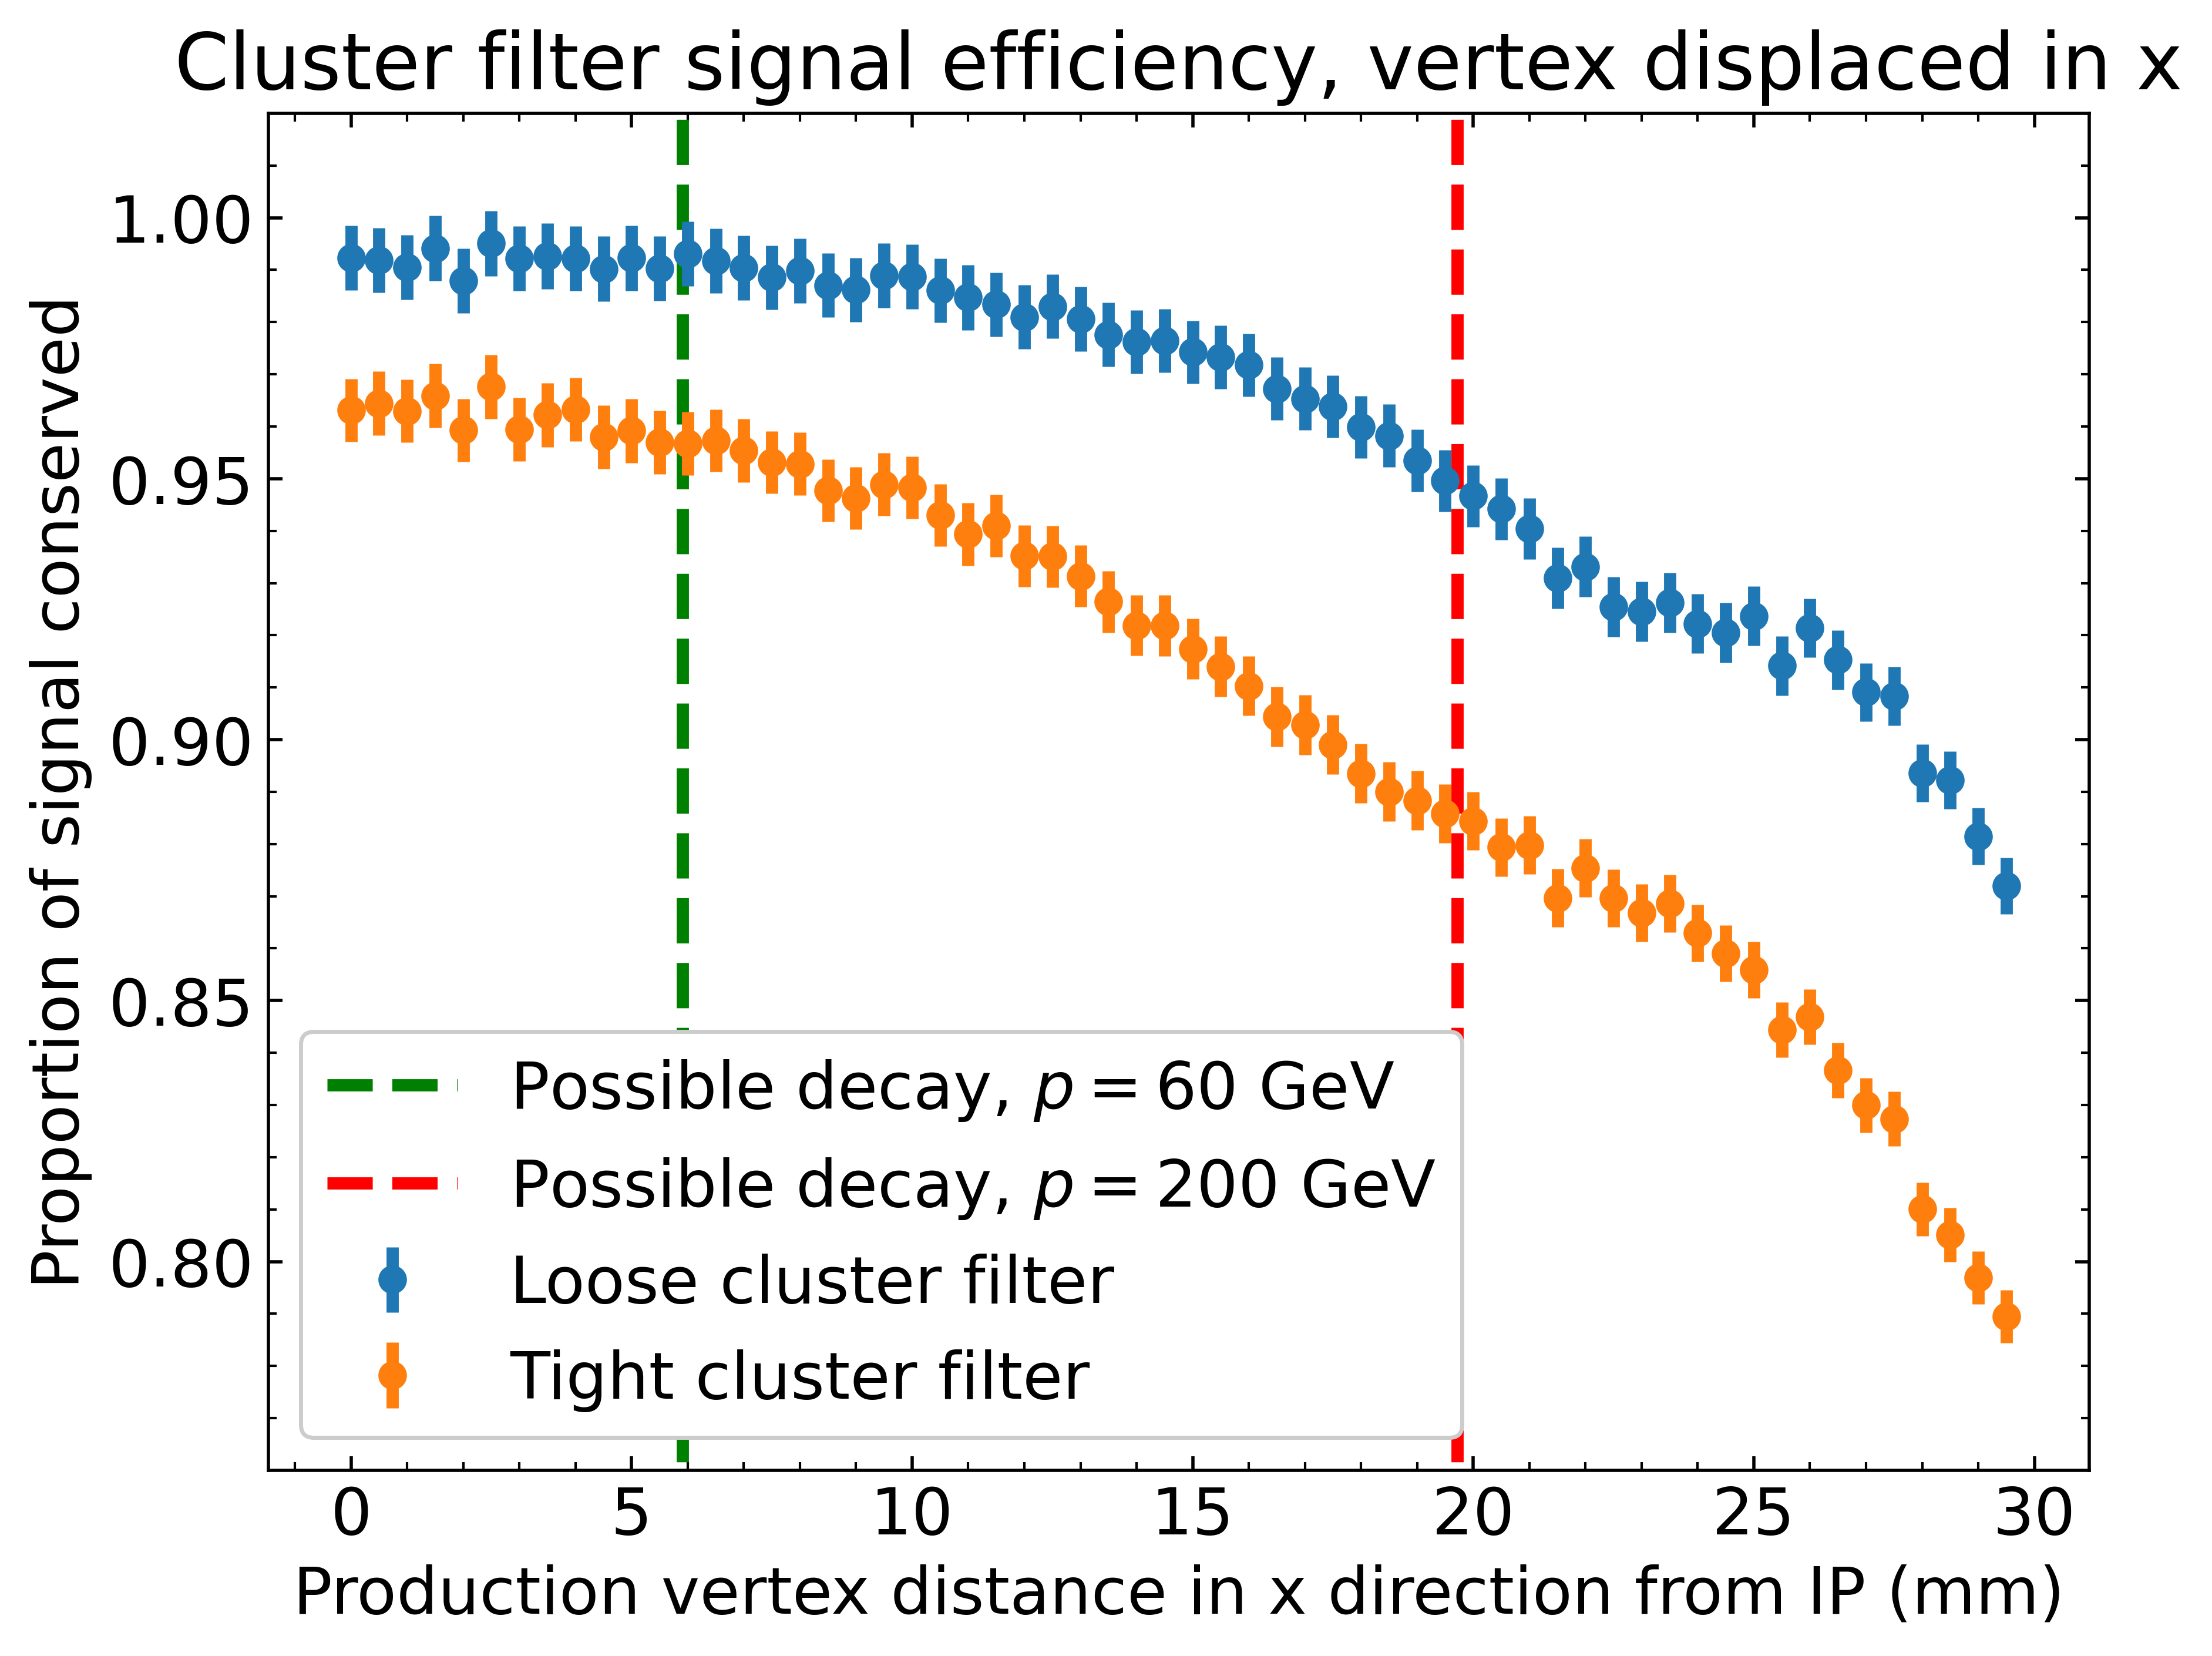

In [35]:
# pull files from local drive
STUDY_NAME = "x0to30"
DIR_IN = '/Users/chris/Desktop/MC/data/ipstudies/' + STUDY_NAME
DIR_OUT = '/Users/chris/Desktop/MC/plots/ipstudy'
zs = np.arange(0,30,0.5)
NAMES = ['%.1f' % z for z in zs]
files_in = [R.TFile(os.path.join(DIR_IN,f'histograms_{n}.root')) for n in NAMES]

# extract contents from files
nH = len(NAMES)
histos_nocut_theta = [files_in[i].MyTrackPerf.clusters_vb.theta for i in range(nH)]
histos_loose_theta = [files_in[i].MyTrackPerf_loose.clusters_vb.theta for i in range(nH)]
histos_tight_theta = [files_in[i].MyTrackPerf_tight.clusters_vb.theta for i in range(nH)]

# grab total contents
l = len(zs)
tothits_nocut = [0] * l
tothits_loose = [0] * l
tothits_tight = [0] * l
ratio_loose   = [0] * l
r_sig_loose   = [0] * l
ratio_tight   = [0] * l
r_sig_tight   = [0] * l

numbins = histos_nocut_theta[0].GetNbinsX() # assume all histos have same num bins
# loop over each z value, each bin in histo
for iz,z in enumerate(zs):
    tothits_nocut[iz] = tot_all = np.sum([histos_nocut_theta[iz].GetBinContent(j) for j in range(numbins)])
    sig_all = np.sqrt(tothits_nocut[iz])
    tothits_loose[iz] = tot_loose = np.sum([histos_loose_theta[iz].GetBinContent(j) for j in range(numbins)])
    sig_loose = np.sqrt(tothits_loose[iz])
    tothits_tight[iz] = tot_tight = np.sum([histos_tight_theta[iz].GetBinContent(j) for j in range(numbins)])
    sig_tight = np.sqrt(tothits_tight[iz])
    
    ratio_loose[iz] = tothits_loose[iz]/tothits_nocut[iz]
    r_sig_loose[iz] = np.sqrt((sig_loose/tot_all)**2 + (tot_loose * sig_all/tot_all**2)**2)
    #
    ratio_tight[iz] = tothits_tight[iz]/tothits_nocut[iz]
    r_sig_tight[iz] = np.sqrt((sig_tight/tot_all)**2 + (tot_tight * sig_all/tot_all**2)**2)
    # 

pts = [0.59059059 * 10, 1.97197197 * 10, 4.92492492 * 10]
plt.figure(figsize=(8,6),dpi=500)
plt.plot([pts[0],pts[0]],[0,1.05],'--',color='green',label=r"Possible decay, $p=60$ GeV")
plt.plot([pts[1],pts[1]],[0,1.05],'--',color='red',label=r"Possible decay, $p=200$ GeV")
plt.errorbar(zs,ratio_loose,yerr=r_sig_loose,linestyle='',marker='o',label='Loose cluster filter')
plt.errorbar(zs,ratio_tight,yerr=r_sig_tight,linestyle='',marker='o',label='Tight cluster filter')
plt.legend(framealpha=1)
plt.ylim(0.76,1.02)
plt.xlabel("Production vertex distance in x direction from IP (mm)")
plt.ylabel("Proportion of signal conserved")
plt.title("Cluster filter signal efficiency, vertex displaced in x")
plt.savefig(os.path.join(DIR_OUT,"xrange_0to30mm.png"))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Help on Legend in module matplotlib.legend object:

class Legend(matplotlib.artist.Artist)
 |  Legend(parent, handles, labels, *, loc=None, numpoints=None, markerscale=None, markerfirst=True, reverse=False, scatterpoints=None, scatteryoffsets=None, prop=None, fontsize=None, labelcolor=None, borderpad=None, labelspacing=None, handlelength=None, handleheight=None, handletextpad=None, borderaxespad=None, columnspacing=None, ncols=1, mode=None, fancybox=None, shadow=None, title=None, title_fontsize=None, framealpha=None, edgecolor=None, facecolor=None, bbox_to_anchor=None, bbox_transform=None, frameon=None, handler_map=None, title_fontproperties=None, alignment='center', ncol=1, draggable=False)
 |  
 |  Place a legend on the figure/axes.
 |  
 |  Method resolution order:
 |      Legend
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, parent, handles, labels, *, loc=None, numpoints=None, markerscale=None, markerfirst=True, reve

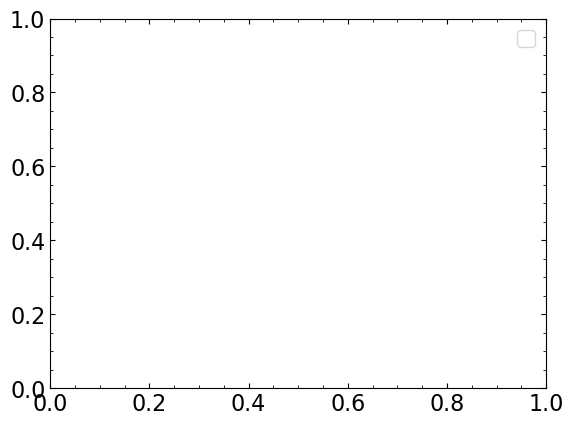

In [34]:
help(plt.legend())